In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude, PolynomialDecay

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(len(set(y_train)), activation='softmax')(x)
 
model = Model(i, x)

In [ ]:
batch_size = 32
epochs = 50
num_images = x_test.shape[0]
end_step = np.ceil(num_images/batch_size).astype(np.int32)*epochs
pruning_params = {'pruning_schedule': PolynomialDecay(initial_sparsity = 0.5, final_sparsity = 0.8, begin_step = 0, end_step = end_step)}
model_for_pruning = prune_low_magnitude(model, **pruning_params)
model_for_pruning.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
r = model_for_pruning.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/50
1563/1563 [==============================] - 31s 17ms/step - loss: 1.3087 - accuracy: 0.5423 - val_loss: 1.0120 - val_accuracy: 0.6470
Epoch 2/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8274 - accuracy: 0.7096 - val_loss: 0.8430 - val_accuracy: 0.7049
Epoch 3/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6659 - accuracy: 0.7666 - val_loss: 0.6943 - val_accuracy: 0.7604
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5594 - accuracy: 0.8039 - val_loss: 0.6703 - val_accuracy: 0.7716
Epoch 5/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4804 - accuracy: 0.8306 - val_loss: 0.7212 - val_accuracy: 0.7555
Epoch 6/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4178 - accuracy: 0.8521 - val_loss: 0.6066 - val_accuracy: 0.7939
Epoch 7/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.3651 - accuracy: 0.8700 - val_loss: 0.6576 -

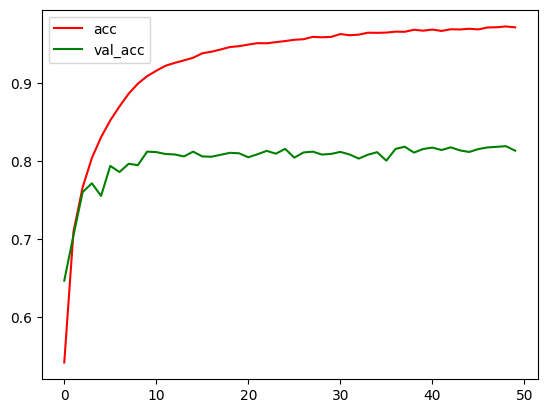

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
r.history

{'loss': [1.3086775541305542,
  0.8274036645889282,
  0.6658835411071777,
  0.5593833327293396,
  0.4803716838359833,
  0.4177713394165039,
  0.3651134669780731,
  0.3197256624698639,
  0.28007397055625916,
  0.25654032826423645,
  0.23742105066776276,
  0.21847423911094666,
  0.20585522055625916,
  0.19403992593288422,
  0.18664532899856567,
  0.1730295866727829,
  0.16868378221988678,
  0.16147743165493011,
  0.15523959696292877,
  0.15287402272224426,
  0.14317651093006134,
  0.14038993418216705,
  0.13608801364898682,
  0.13252680003643036,
  0.13092957437038422,
  0.126236230134964,
  0.12441764771938324,
  0.11576113104820251,
  0.11852242052555084,
  0.11619854718446732,
  0.11095456779003143,
  0.11272776126861572,
  0.10922680050134659,
  0.10422934591770172,
  0.10300496965646744,
  0.10221635550260544,
  0.09600239992141724,
  0.09981457144021988,
  0.09278661012649536,
  0.09513046592473984,
  0.09031738340854645,
  0.09261824935674667,
  0.08825919777154922,
  0.0898849219